# Set Up

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import random
import math
%matplotlib inline

from os import path, getcwd
from glob import glob

code_dir = getcwd()
data_dir = path.expanduser('~/data/workshop-content18/3-snc/data/')

ais_pathnames = glob(data_dir + '*.txt')
ais_basenames = [path.basename(pn) for pn in ais_pathnames]

delta_cur_basename = next(bn for bn in ais_basenames if 'Deltaport_Current' in bn)
delta_his_basename = next(bn for bn in ais_basenames if 'Deltaport_History' in bn)

max_rows=int(3e6)
delta_cur = pd.read_csv(
    data_dir + delta_cur_basename, sep='\t', nrows=max_rows, low_memory=False,
    parse_dates=['ReceivedTime'])

In [2]:
if delta_cur.isna().iloc[-1,:].sum() > 10:
    delta_cur = delta_cur.iloc[:-1, :]

In [3]:
delta_cur.UserID = delta_cur.UserID.astype('category')

In [4]:
delta_cur = delta_cur.loc[delta_cur.Latitude < 80]

In [5]:
nPoints_by_UserID = pd.value_counts(delta_cur.UserID)

In [6]:
nPoints_threshold = 1000
userID_allowed = nPoints_by_UserID.index[nPoints_by_UserID > nPoints_threshold]
userID_allowed.values.remove_unused_categories(inplace=True)

In [7]:
delta_cur = delta_cur.loc[delta_cur.UserID.apply(lambda x: x in userID_allowed.values)]

In [8]:
ReceivedDate = delta_cur.ReceivedTime.dt.date
ReceivedDate_ValueCounts = pd.value_counts(ReceivedDate)
ReceivedDate_ValueCounts.to_frame()

,ReceivedTime
2013-10-23,276045
2013-10-29,267727
2013-10-22,266404
2013-10-27,259420
2013-10-28,253972
2013-10-26,238035
2013-10-30,237996
2013-10-31,237442
2013-10-25,220591
2013-10-24,196405


In [9]:
delta_cur['ReceivedDay'] = ReceivedDate.apply(lambda x: x.day)

In [10]:
sns.set(style="whitegrid", color_codes=True)

In [11]:
df_grp = delta_cur.groupby(['ReceivedDay', 'UserID'])

Let's plot records of ships just on the 22nd

In [12]:
delta_cur_22 = delta_cur.loc[delta_cur.ReceivedDay == 22, :]

# One Ship

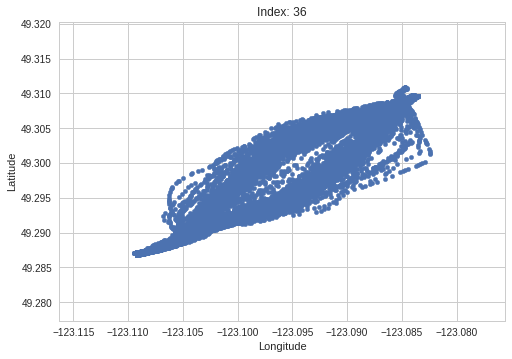

In [14]:
UserID_vc = pd.value_counts(delta_cur.UserID)
i = random.randint(1,int(UserID_vc.size)) # 117
ship = (delta_cur.loc[delta_cur.UserID == UserID_vc.index[i]])
ship.plot.scatter('Longitude', 'Latitude', title='Index: ' + str(i));

ship_sparse = (ship.reset_index(drop=True)
                   .iloc[::10, :]
                   .reset_index(drop=True))
m = folium.Map(location=[49, -123.7], 
               tiles='Stamen Terrain', zoom_start=9)
latlon = zip(list(ship_sparse.Latitude.values), 
             list(ship_sparse.Longitude.values))
#folium.PolyLine(list(latlon), color='red').add_to(m)
j = 1
N = len(ship_sparse.Latitude.values)
for coord in latlon:
    folium.Circle(location=coord, popup=str(j), fill=True, color='blue').add_to(m)
    #folium.Circle(location=coord, popup=str(j), fill=True,
    #              color=RGBToHTMLColor(((2*j)%255,(5*j)%255,(10*j)%255))).add_to(m)
    j += 1

m

# x(t), y(t)

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(list(ship_sparse.Longitude.values))
plt.ylabel('Longitude')
plt.xlabel('Time (sampling speed)')
plt.title('x(t)')

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(list(ship_sparse.Latitude.values))
plt.ylabel('Latitude')
plt.xlabel('Time (sampling speed)')
plt.title('y(t)')

In [ ]:
# Compute time in seconds
time_series = pd.to_datetime(ship_sparse.ReceivedTime).dt.second + \
pd.to_datetime(ship_sparse.ReceivedTime).dt.minute * 60 + \
pd.to_datetime(ship_sparse.ReceivedTime).dt.hour * 60 * 60 + \
pd.to_datetime(ship_sparse.ReceivedTime).dt.day * 24 * 60 * 60

# Begin counting from zero
time_series = time_series - time_series[0]

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time_series/(60*60), list(ship_sparse.Longitude.values))
plt.scatter(time_series/(60*60), list(ship_sparse.Longitude.values))
plt.ylabel('Longitude')
plt.xlabel('Time(h)')
plt.title('x(t)')

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time_series/(60*60), list(ship_sparse.Latitude.values))
plt.scatter(time_series/(60*60), list(ship_sparse.Latitude.values))
plt.ylabel('Latitude')
plt.xlabel('Time (min)')
plt.title('y(t)')

# Cut the outliers

In [ ]:
# no = no outliers
BEGIN = 200;
END = -1;

time_series_no = time_series[BEGIN:END].reset_index().ReceivedTime
ship_sparse_no = ship_sparse[BEGIN:END].reset_index()

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time_series_no/(60*60), list(ship_sparse_no.Longitude.values))
plt.scatter(time_series_no/(60*60), list(ship_sparse_no.Longitude.values))
plt.ylabel('Longitude')
plt.xlabel('Time(h)')
plt.title('x(t)')

In [ ]:
plt.figure(figsize=(15, 5), dpi= 80, facecolor='w', edgecolor='k')
plt.plot(time_series_no/(60*60), list(ship_sparse_no.Latitude.values))
plt.scatter(time_series_no/(60*60), list(ship_sparse_no.Latitude.values))
plt.ylabel('Latitude')
plt.xlabel('Time (min)')
plt.title('y(t)')